In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
ds = load_iris()
X_train, X_test, y_train, y_test = train_test_split(ds['data'], ds['target'])
# why am i using classification dataset?
# cuz no enough caffine :/

Epoch=1, Cost=1.669642857142857
Epoch=2, Cost=0.6179865182687725
Epoch=3, Cost=0.4417661869590176
Epoch=4, Cost=0.40062664721170205
Epoch=5, Cost=0.3808871614138135
Epoch=6, Cost=0.3650658636805042
Epoch=7, Cost=0.3504493231041357
Epoch=8, Cost=0.3365925398962255
Epoch=9, Cost=0.3234000726490323
Epoch=10, Cost=0.3108314193965262
Epoch=11, Cost=0.29885573184752473
Epoch=12, Cost=0.2874448062223159
Epoch=13, Cost=0.27657195243671995
Epoch=14, Cost=0.26621176822896014
Epoch=15, Cost=0.2563400546673576
Epoch=16, Cost=0.24693375571219525
Epoch=17, Cost=0.2379709037105873
Epoch=18, Cost=0.22943056793691607
Epoch=19, Cost=0.22129280563483447
Epoch=20, Cost=0.21353861538131552
Epoch=21, Cost=0.20614989265371295
Epoch=22, Cost=0.19910938749439977
Epoch=23, Cost=0.19240066417375193
Epoch=24, Cost=0.18600806275711865
Epoch=25, Cost=0.17991666248590138
Epoch=26, Cost=0.17411224688711294
Epoch=27, Cost=0.16858127052982744
Epoch=28, Cost=0.16331082735078636
Epoch=29, Cost=0.15828862047509304
Epoch=3

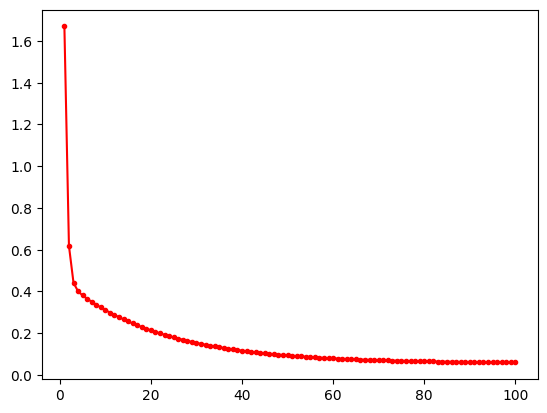

In [2]:
from ml_algos import *
ml = regression.LinearRegression(show_cost=True, show_cost_graph=True)
ml.fit(X_train, y_train)

In [3]:
ml.score(X_test, y_test)

0.05962263605579743

In [4]:
obj = speech.TTS()
obj.speak("hello")